<a href="https://colab.research.google.com/github/CristianoMoretti/projects/blob/main/PyTorch_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1-Main**

In [7]:
import torch
import numpy
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


print(torch.__version__)

x = torch.rand(5, 3)

print(x)
print(torch.cuda.is_available())


 # Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

2.0.1+cu118
tensor([[0.8971, 0.8265, 0.6634],
        [0.2373, 0.7803, 0.3374],
        [0.1973, 0.6194, 0.8149],
        [0.1256, 0.7065, 0.3133],
        [0.3798, 0.2026, 0.9327]])
False
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


**2-Tensor Basics**

In [8]:
# https://www.youtube.com/watch?v=exaWOE8jvy8&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=2

import torch
import numpy as np
x = torch.rand(3, 2)
print(x)

x = torch.empty(2, 2, 3)
print(x)

x = torch.ones(2, 2)
print(x)

print(x.dtype)

x = torch.ones(2,2, dtype=torch.int16)
print(x)
print(x.size())

x = torch.tensor([2.5, 0.1])
print(x)

x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
print(z)

z = torch.add(x, y)
print(z)

y.add_(x)
print(y)

z = x - y
z = torch.sub(x, y)
print(z)

z = x * y
z = torch.mul(x, y)
y = y.mul_(x)
print(z)
print(y)

x = torch.rand(5, 3)
print(x)
print(x[1, :])

x = torch.rand(4, 4)
print(x)

y = x.view(16)
print(y)
y = x.view(-1)
print(y)

y = x.view(2, 8)
print(y)
y = x.view(-1, 8)
print(y)

# convert from numpy to torch and viceversa
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(type(b))

# on the cpu they both point to teh same memory location and if I chnage one I also change the other
a.add_(1)
print(a)
print(b)

a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)
a += 1
print(a)
print(b)

# we can work on the gpu
if torch.cuda.is_available():
    device = torch.device("cuda")
    # this will create the tensor on the GPU
    x = torch.ones(5, device = device)
    # or we can use the following
    y = torch.ones(5)
    # this will move the tensor from cpu to gpu
    y = y.to(device)
    # perform the computation on the gpu which is much faster
    z = x + y
    # z.numpy() wil retrun an error as numpy() an only be called on the cpu
    z = z.to("cpu")
    z = z.numpy()

tensor([[0.7924, 0.5914],
        [0.8501, 0.1672],
        [0.3454, 0.9692]])
tensor([[[1.6164e-04, 4.4608e-41, 1.6164e-04],
         [4.4608e-41, 1.4013e-45, 0.0000e+00]],

        [[1.4013e-45, 0.0000e+00, 1.4013e-45],
         [0.0000e+00, 1.4013e-45, 0.0000e+00]]])
tensor([[1., 1.],
        [1., 1.]])
torch.float32
tensor([[1, 1],
        [1, 1]], dtype=torch.int16)
torch.Size([2, 2])
tensor([2.5000, 0.1000])
tensor([[0.8463, 0.1601],
        [0.6713, 0.7309]])
tensor([[0.5710, 0.4537],
        [0.0257, 0.2698]])
tensor([[1.4173, 0.6137],
        [0.6970, 1.0007]])
tensor([[1.4173, 0.6137],
        [0.6970, 1.0007]])
tensor([[1.4173, 0.6137],
        [0.6970, 1.0007]])
tensor([[-0.5710, -0.4537],
        [-0.0257, -0.2698]])
tensor([[1.1995, 0.0982],
        [0.4679, 0.7314]])
tensor([[1.1995, 0.0982],
        [0.4679, 0.7314]])
tensor([[0.8894, 0.1077, 0.7245],
        [0.6614, 0.6336, 0.1976],
        [0.9692, 0.8613, 0.4344],
        [0.8051, 0.8498, 0.0613],
        [0.4724, 0

**3-Autograd Gradient Calculation**

In [9]:
# https://www.youtube.com/watch?v=DbeIqrwb_dE&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=3

import torch

# the required_grad will tell pytorch to calculate the gradiens later on for the tensor during the optimization step
x = torch.ones(5, requires_grad=True)
print(x)

# whenever we are doing operations with this tensor pytorch will create a computational graph for us
x = torch.randn(3, requires_grad=True)
print(x)

# this will create a computational graph
# with a technique called back propagation we can calculated the gradients
# first we do a forward pass where we calculate the output y. If required_grad = True pytorch will store a funciton for us called addbackwards.
# this function is used in the backpropagation to get the gradients
# gradients will be calculated in the backward pass
y = x + 2
# this will show the AddBackward fucntion has been added to the oupput ot the grad_fn attribute
print(y)

# our gradient function will be multiplication backwards function
z = y*y*2
print(z)
# our gradient function will be the mean backwards function
# z = z.mean()
# print(z)

# when we want to calculate the gradient we will call (if the output is a scalar like for z.mean())
# z.backward() # dz/dx
# x has an attribut grad where the gradients are stored
# print(x.grad)

# if we dont use the mean z has size 1 x 3, now we need to pass an argument as z.backward() can only we used with scalar outputs, to calculate the gradients we need to vreate a vector of the same size.
# The gardients are the product of the Jacobian matrix and the gradient vector
# if the output is not a scalar value we must give a vector
# most of timres the output will be a scalar
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v)
print(x.grad)

# during trainibng we dont want to update the inputs just the weights, so we can call these different methods:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

# if the function has a trailing underscore in pythoin it means it will modify the variable in place
# x.requires_grad_(False)
# OR
# y = x.detach() # this will create a new tensor with the same values
print(y)
# OR wrap in a with statement
# with torch.no_grad():
#    y = x + 2
#    print(y)

# whenever we all this function y = x + 2 the gradient for this function will accumulate in the .grad attribute

weights = torch.ones(4, requires_grad=True)

# say we have a trainign loop

# first is only 1 iterations
for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    # all the gradients accumulate after each iteration which is somethign we dont want, so we must zero the gradients to ensure gradients to not accumulate
    print(weights.grad)
    weights.grad.zero_()


# pytorch built in optimiser
optimiser = torch.optim.SGD([weights], lr = 0.01)
optimiser.step()
# this will do exactly the same, it will reset the gradients.
# we must empty the gradient before performign the next operation
optimiser.zero_grad()

tensor([1., 1., 1., 1., 1.], requires_grad=True)
tensor([ 0.6243,  0.6444, -1.6226], requires_grad=True)
tensor([2.6243, 2.6444, 0.3774], grad_fn=<AddBackward0>)
tensor([13.7741, 13.9858,  0.2849], grad_fn=<MulBackward0>)
tensor([1.0497e+00, 1.0578e+01, 1.5096e-03])
tensor([2.6243, 2.6444, 0.3774], grad_fn=<AddBackward0>)
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


**4-Back Propagation**

In [10]:
# https://www.youtube.com/watch?v=3Kb0QS6z7WA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=4

import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat-y)**2

print(loss)

loss.backward()
print(w.grad)

### updates weights
### next forward and backwards

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


**5-Gradient Descent**

In [11]:
# https://www.youtube.com/watch?v=E-I2DNVzQLg&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=5

# this can be done in 4 different ways

print('CASE 1')

'''
Prediction: Manually
Gradient Computation: Manually
Loss Computation: Manually
Parameter updates: Manually
'''

# I am using linear regression
import numpy as np

# f = w * x
# f = 2 * x

X = np.array([1, 2, 3, 4], dtype = np.float32)
# csince our formula is 2x
Y = np.array([2, 4, 6, 8], dtype=np.float32)

# our weight initially is:
w= 0.0

# model prediction
def forward(x):
    return w * x
# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()


# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)

def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    dw = gradient(X, Y, y_pred)

    # update weights (we go in the negative direction of the training)
    w -= learning_rate *dw

    if epoch % 1 ==0: # I am printing every step)
        print(f'epoch{epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')




'''
Prediction: Manually
Gradient Computation: Autograd
Loss Computation: Manually
Parameter updates: Manually
'''
print('CASE 2')

# I am using linear regression
import torch

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)
# our weight initially is 0:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# f = w * x
# f = 2 * x

# model prediction
def forward(x):
    return w * x
# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
# the backward propagation is not as exact as the numeric propagation, so I will need more iterations
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    # this wiull calculate the gradients respect to w
    l.backward()

    # update weights
    # this should be not part of our gradient tracking graph (we need to use original w not w containing gradient updates), so I need to wrap with a torch.no_grad statement
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero gradients
    # we must zero the gradients, otherwise each iteration the gradient will be calculted and accumulate in w.grad attribute
    w.grad.zero_()

    if epoch % 1 ==0: # I am printing every step)
        print(f'epoch{epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

print('CASE 3')
'''
Prediction: Manually
Gradient Computation: Autograd
Loss Computation: PyTorch Loss
Parameter updates: PyTorch Optimizer
'''

# respect to case 2 we need to replace the loss and optimizatio method
import torch.nn as nn

# General training pipeline in PyTorch, typically we have 3 steps
# 1) Design our model (input size, output size, forward pass with all the operations and layers)
# 2) Constract the loss and the optimizer
# 3) Training Loop
#     - forward pass: compute prediction
#     - backward pass: we get the gradients
#     - update weights
#     - we iterate this a couple of times until we are done



X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)
# our weight initially is 0:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# f = w * x
# f = 2 * x

# model prediction
def forward(x):
    return w * x
# loss = MSE

loss = nn.MSELoss()
learning_rate = 0.01
n_iters = 100
optimizer = torch.optim.SGD([w],  lr = learning_rate)


print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    # this wiull calculate the gradients respect to w
    l.backward()

    # update weights

    # we do not need to optimise the weights manually anymore, I can use an optimiser.step operation
    '''
        with torch.no_grad():
        w -= learning_rate * w.grad

    '''
    optimizer.step()

    # we still have to zero the gradients
    # we must zero the gradients, otherwise each iteration the gradient will be calculted and accumulate in w.grad attribute
    optimizer.zero_grad()

    if epoch % 1 ==0: # I am printing every step)
        print(f'epoch{epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

print('CASE 4') # we replace our manaully implemented forward method with a PyTorch model
'''
Prediction: PyTorch Model
Gradient Computation: Autograd
Loss Computation: PyTorch Loss
Parameter updates: PyTorch Optimizer
'''

# using the Torch model inputs need to be  different shape (2D array now)
# the number of rows is the numbe of samples and for each row we have the number of features.
# here we have 4 samples and 1 features
# the same for our 4, it needs to have the same shape
X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32) # we take a sample for testing, the sample is an array of values (in this case there is only 1). It has to be a Tensor as PyTorch works with tensors.
n_samples, n_features = X.shape
print(n_samples, n_features)

# we define our model, we need an input size and an output size
input_size = n_features
output_size = n_features

# our weight initially is 0:
# we don't need the weights tensor anymore as out model knows the parameters
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# f = w * x
# f = 2 * x

# model prediction, typically we have to designed it for ourselves but as this is very trivial we use the Linear model from PyTorch
'''
def forward(x):
    return w * x
'''
# in this case we did not have to come up with a model ourselves and this model was already provided by PyTorch
model = nn.Linear(in_features = input_size, out_features = output_size)


# if we need a custom model, we need to derive it from nn.Module
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        # this is how we call the super constructor of the parent class
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

# loss = MSE

loss = nn.MSELoss()
learning_rate = 0.01
n_iters = 10
# we repalce weights entered manually with model.parameters
# optimizer = torch.optim.SGD([w],  lr = learning_rate)
optimizer = torch.optim.SGD(model.parameters(),  lr = learning_rate)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') # we use method item() to return a float

# Training
for epoch in range(n_iters):
    # prediction = forward pass
    # for the prediction we simply call the model
    # y_pred = forward(X)
    y_pred = model(X)


    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    # this wiull calculate the gradients respect to w
    l.backward()

    # update weights

    # we do not need to optimise the weights manually anymore, I can use an optimiser.step operation
    '''
        with torch.no_grad():
        w -= learning_rate * w.grad

    '''
    optimizer.step()

    # we still have to zero the gradients
    # we must zero the gradients, otherwise each iteration the gradient will be calculted and accumulate in w.grad attribute
    optimizer.zero_grad()

    if epoch % 1 ==0: # I am printing every step)
        # if we want to print the again we have to unpack them
        [w, b] = model.parameters() # this will return a list of list for the weights and a list for the bias
        # print('b =', b.item())
        # print(f'epoch{epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        print(f'epoch{epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

CASE 1
Prediction before training: f(5) = 0.000
epoch1: w = 1.200, loss = 30.00000000
epoch2: w = 1.680, loss = 4.79999924
epoch3: w = 1.872, loss = 0.76800019
epoch4: w = 1.949, loss = 0.12288000
epoch5: w = 1.980, loss = 0.01966083
epoch6: w = 1.992, loss = 0.00314574
epoch7: w = 1.997, loss = 0.00050331
epoch8: w = 1.999, loss = 0.00008053
epoch9: w = 1.999, loss = 0.00001288
epoch10: w = 2.000, loss = 0.00000206
epoch11: w = 2.000, loss = 0.00000033
epoch12: w = 2.000, loss = 0.00000005
epoch13: w = 2.000, loss = 0.00000001
epoch14: w = 2.000, loss = 0.00000000
epoch15: w = 2.000, loss = 0.00000000
epoch16: w = 2.000, loss = 0.00000000
epoch17: w = 2.000, loss = 0.00000000
epoch18: w = 2.000, loss = 0.00000000
epoch19: w = 2.000, loss = 0.00000000
epoch20: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
CASE 2
Prediction before training: f(5) = 0.000
epoch1: w = 0.300, loss = 30.00000000
epoch2: w = 0.555, loss = 21.67499924
epoch3: w = 0.772, loss = 15.660187

**7-Linear Regression**

[[-0.61175641]
 [-0.24937038]
 [ 0.48851815]
 [ 0.76201118]
 [ 1.51981682]
 [ 0.37756379]
 [ 0.51292982]
 [-0.67124613]
 [-1.39649634]
 [ 0.31563495]
 [-0.63699565]
 [-0.39675353]
 [-1.10061918]
 [ 0.90085595]
 [-1.09989127]
 [ 0.82797464]
 [-0.07557171]
 [-0.35224985]
 [-0.67066229]
 [-1.07296862]
 [-0.30620401]
 [ 2.18557541]
 [ 0.86540763]
 [ 0.19829972]
 [-0.38405435]
 [-0.68372786]
 [ 0.05080775]
 [ 0.58281521]
 [ 1.25286816]
 [-0.75439794]
 [-0.34934272]
 [-0.88762896]
 [ 0.18656139]
 [ 0.87616892]
 [ 0.83898341]
 [-0.50446586]
 [-0.34385368]
 [ 1.6924546 ]
 [-2.3015387 ]
 [ 0.93110208]
 [ 2.10025514]
 [ 1.46210794]
 [-0.84520564]
 [-0.87785842]
 [-0.3224172 ]
 [ 0.88514116]
 [ 0.16003707]
 [ 1.13162939]
 [-0.37528495]
 [ 0.50249434]
 [-0.20889423]
 [ 0.12015895]
 [ 0.58662319]
 [ 0.3190391 ]
 [-0.69166075]
 [ 0.69803203]
 [ 1.19891788]
 [-0.20075807]
 [ 0.53035547]
 [ 0.74204416]
 [ 0.41005165]
 [ 0.11900865]
 [-0.7612069 ]
 [ 0.42349435]
 [ 0.30017032]
 [-1.1425182 ]
 [ 0.18515

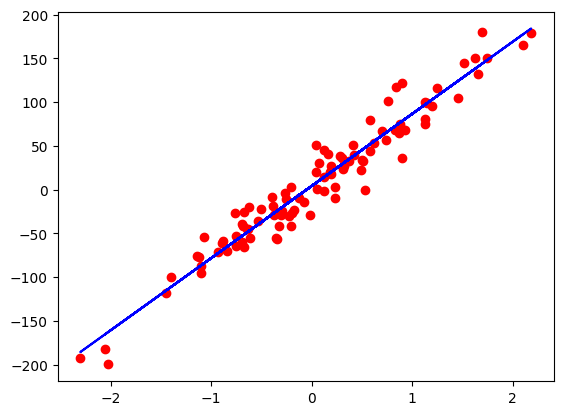

In [12]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimiser
# 3) Training loop
#   - forward pass: compute prediction and loss
#   - backward pass: gradients
#   - update weights


import torch
import torch.nn as nn # we import the neural network module
import numpy as np # for data transformation
from sklearn import datasets # we want to generate a regression dataset
import matplotlib.pyplot as plt


# 0) prepare data
# Let's generate a regression dataset

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise=20, random_state=1)
print(X_numpy)
print(y_numpy)
# we need to convert the numpy array from double to float
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(X.shape)
print(y.shape)
# we need to re-shape our y as the whole shape from dataset is only one array containing 100 values.
# we can do in 2 different ways
# y = y.view(-1, 1)
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape


# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
# we use a built in loss function from PyTorch
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# 3) training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    #reset gradients because any time we call the backward function it will sum up the gradients in the .grad attribute
    optimizer.zero_grad()

    if (epoch + 1) % 1 == 0:
        w, b = model.parameters()
        # print(w.shape)
        #' print(b.shape)
        print(f'epoch{epoch+1}, loss = {loss.item():.4f}, weight = {w[0][0].item():.4f}')


# plot
# let's get all the predicted values, we call out final model.
# in model we have the required_grad attribute set to true, so we wanto to generate a new tensor where the required_grad attribute is set to false
# we convert to numpy

predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy,  'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

**8-Logistic Regression**

In [13]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimiser
# 3) Training loop
#   - forward pass: compute prediction and loss
#   - backward pass: gradients
#   - update weights


import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler # class used to scale out features
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


#0) Prepare the data
# it is a binary classification problem where we can predict cancer based on the existing features
# this will return a sklearn Bunch class. Bunch is a subclass of Dict
bc = datasets.load_breast_cancer()
# print(bc)
#' print(type(bc))
X, y = bc.data, bc.target
# X.shape is tellgn me
print(X.shape)
print(y.shape)

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=1234)

# scale
# Standard scaler will make our features to have 0 mean and unit variance, this is recommended to do when you work with logistic regression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# we are not repeating the fit step whcih determines the standard deviation and the mean. they are stored in StandardScaler from the function called before
X_test = sc.transform(X_test)

# transporm to tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape our y tensor so that as now I just have one row and we want to make it a column vector, so we want to put each value in one row with just one column
y_train = y_train.view(y_train.shape[0], 1)
y_test= y_test.view(y_test.shape[0], 1)

# 1) model
# our model is a comoination of weights an d bias, then in the logistc regression we appl a sigmoid function at the end
# f = wx +b, sigmoid at the end
# we will create out own model

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        # we build our model, the first layer is a linear model which only has one value (one class labed) at the end as output
        # we will have at the end 30 input features and 1 output features
        self.linear = nn.Linear(n_input_features, 1)


    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted


model = LogisticRegression(n_features)

# 2) loss and optiizer
criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#3)
num_epochs = 50000

for epoch in range(num_epochs):

    # forward pass and loss
    y_predicted = model((X_train))
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    #update the weights - pytorch will do all the calculation for us
    optimizer.step()

    # zero the gradients
    optimizer.zero_grad()

    if (epoch+1)%10 ==0:
        print(f'epoch{epoch+1}, loss = {loss.item():.4f}')


# let's evaluate th emodel
# the evluation shoudl not be part of or computational graph where wewnt ot track th ehosotry
with torch.no_grad(): # if we don't use no_grad the model this will part of the computatipnal grapgh, it will track the gradient
    y_predicted = model(X_test)
    print(type(y_predicted))
    # let's convert to class labels 0 or 1
    # the sigmoid function will return a value between 0 and 1
    # if it is larger than 0.5 is class 1 otherwise is class 0
    y_predicted_cls = y_predicted.round()
    print(type(y_predicted_cls.eq(y_test)))
    print(type(y_predicted_cls.eq(y_test).sum()))
    acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0]) # y_test.shape[0] will return the number of samples
    print('type acc is: ', type(acc))
    # acc is a tensor with just one value
    print(f'accuracy = {acc:.2f}') # OR  print(f'accuracy = {acc.item():.2f}')


Streaming output truncated to the last 5000 lines.
epoch60, loss = 0.3013
epoch70, loss = 0.2806
epoch80, loss = 0.2637
epoch90, loss = 0.2496
epoch100, loss = 0.2376
epoch110, loss = 0.2272
epoch120, loss = 0.2182
epoch130, loss = 0.2102
epoch140, loss = 0.2030
epoch150, loss = 0.1966
epoch160, loss = 0.1908
epoch170, loss = 0.1855
epoch180, loss = 0.1806
epoch190, loss = 0.1762
epoch200, loss = 0.1720
epoch210, loss = 0.1682
epoch220, loss = 0.1647
epoch230, loss = 0.1613
epoch240, loss = 0.1582
epoch250, loss = 0.1553
epoch260, loss = 0.1526
epoch270, loss = 0.1500
epoch280, loss = 0.1475
epoch290, loss = 0.1452
epoch300, loss = 0.1430
epoch310, loss = 0.1409
epoch320, loss = 0.1389
epoch330, loss = 0.1370
epoch340, loss = 0.1352
epoch350, loss = 0.1335
epoch360, loss = 0.1318
epoch370, loss = 0.1302
epoch380, loss = 0.1287
epoch390, loss = 0.1273
epoch400, loss = 0.1259
epoch410, loss = 0.1245
epoch420, loss = 0.1232
epoch430, loss = 0.1220
epoch440, loss = 0.1208
epoch450, loss = 

**9-Dataset Dataloader**

In [14]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimiser
# 3) Training loop
#   - forward pass: compute prediction and loss
#   - backward pass: gradients
#   - update weights


# a better way to use the dataset is to divide the whole training data set into smaller batches
# this way we loop over the epochs again and then we loop over all the batches
# and then we get the x and y batch and we do the optimization based only on those batches
# pytorch can do the batch calculatio and iteration for us

# TERMS #
# epoch = 1 forward and backward pass of ALL training samples
# batch_size = number of training samples in one forward and backward pass
# number of iterations = number of passes, each pass using [batch_size] number of samples
# e.g. 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 epoch


import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# we can start implementing our own dataset which must inherit the pytorch Dataset class
DATA_SRC = 'C:\\temp\\python\\python_working_with_data\\pytorchTutorial-master\\data\\wine\\wine.csv'
# we want to predict the wine categories, we have 3 categoroes 1, 2, 3 in the first colum, the other columns are the features
# let's load and split our columnts into X and y



class WineDataset(Dataset):
    # we must implement 3 things:
    def __init__(self):
        # data loading
        xy = np.loadtxt(DATA_SRC, delimiter=',', dtype = np.float32, skiprows=1)
        # let's split the whole dataset into X and y
        # we are using slicing, we want all the samples but we do not want the first column in the inner array -> 1: from the first column all the way till the end
        self.x = torch.from_numpy(xy[:, 1:]) # we also convert to torch
        # for y we want tbhe first column and we want to wrp ainside an array as I want an array of arrays (a colmun vector) as opposed to an array of values
        self.y = torch.from_numpy(xy[:, [0]]) # this way we have a column vectoer which has size n_samples, 1
        # we also get the number of samples
        self.n_samples = xy.shape[0] # number of samples is the first numebr of the tuple returned by shape


    def __getitem__(self, index):
        return self.x[index], self.y[index] # this will return a tuple
        # this will allow for indexing later, we can call dataset with an index e.g. dataset[0]

    def __len__(self):
        return self.n_samples
        # this will return the length of the dataset
        # len(dataset)



dataset = WineDataset()

# let's have a look at the very first sample
first_data = dataset[0]
print(first_data)
print(type(first_data)) # data type is a tuple of torch tensors
features, labels = first_data[0], first_data[1]
print(features) # data type is a tensor
print(labels) # data type is a tensor with just one number

# now we are going to use a dataloader
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True) # num_workers set to 2 might make the process faster as it is using multiple sub-processes. shuffle set to true is very useful durign training. num_workers=2 creates an issue on this PC


# we are going to see an example of data in the dataloader
# now we are using this data loader and we will convert it to an iterator
datatiter = iter(dataloader)

# now we call a next function
# data = datatiter.next() this i sthe syntax in pytorch 1.12
# from pytorch 1.13 the only working syntax is:
data = next(datatiter)
# we will unpack it again
print(data)
print(type(data))
features, labels = data[0], data[1] # i could have wriiten this as:  features, labels = data
print(features)
print(type(features))
print(labels)
print(type(labels))


# let's define some hyper-parameters
num_epochs = 2
total_samples = len(dataset)
batch_size = 4
# lets get the number of iterations for each epoch (this will be total number of sampela divided by the bacth size)
n_iterations = math.ceil(total_samples/batch_size) # we need to use match cei as without we would get 44.5 iteration, with math.ceil this will be 45
print('total sample: ', total_samples, ' number iterations: ', n_iterations)

# let's write some dummy training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward, upadte
        if (i+1) % 5 == 0: # every 5th step I want to print some information
            print(f'epoch {epoch + 1 }/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')



# pytorch has some built in datasets,

dataset = torchvision.datasets.MNIST('aaaa', download=True)
print(dataset)
print(type(dataset))


FileNotFoundError: ignored

**10-Dataset Transform**

In [ ]:
'''

# if we use a torch built in dataset we can pass a transform argument to concert to Tensor and apply some transforms
# in this case we use the MNSIT dataset and we aplly the ToTensor() transform whi will convert numpy arrays or images into Tensor
# pytorch has alrealy a lot of transform implemented for us, the official documentation is:
# https://pytorch.org/vision/stable/transforms.html

Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
'''

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# in the last tutorial we created a custom WineDataset class, now we are extending this class to apply our own transforms and apply our own transfer classes



# we can start implementing our own dataset which must inherit the pytorch Dataset class
DATA_SRC = 'C:\\temp\\python\\python_working_with_data\\pytorchTutorial-master\\data\\wine\\wine.csv'
# we want to predict the wine categories, we have 3 categoroes 1, 2, 3 in the first colum, the other columns are the features
# let's load and split our columnts into X and y

# this class will load the data in the init constructor method, then we implemented the getitem whci will allow indexing
# now we will extend the dataset, so our class should also support the transform argument which is optional so at the beginnign we say None
# we want to make a change to the getitem method, so we can apply a transfor if available.
class WineDataset(Dataset):
    # we must implement 3 things:
    def __init__(self, transform = None):
        # data loading
        xy = np.loadtxt(DATA_SRC, delimiter=',', dtype = np.float32, skiprows=1)
        # let's split the whole dataset into X and y
        # we are using slicing, we want all the samples but we do not want the first column in the inner array -> 1: from the first column all the way till the end
        # self.x = torch.from_numpy(xy[:, 1:]) # we also convert to torch
        # for y we want tbhe first column and we want to wrp ainside an array as I want an array of arrays (a colmun vector) as opposed to an array of values
        # self.y = torch.from_numpy(xy[:, [0]]) # this way we have a column vectoer which has size n_samples, 1
        # we also get the number of samples

        # we are not converting to tensor here as we are going to use our custom transofrm class ToTensor()
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.n_samples = xy.shape[0] # number of samples is the first numebr of the tuple returned by shape

        self.transform = transform # by default this attribute can be None

    # we want to make a change to the getitem method, so we can apply a transfor if available.
    def __getitem__(self, index):
        # with tranform I am going to mage this change
        # return self.x[index], self.y[index] # this will return a tuple
        # this will allow for indexing later, we can call dataset with an index e.g. dataset[0]
        sample = self.x[index], self.y[index]

        if self.transform: # if transform not None (python considers None equal to False)
            sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.n_samples
        # this will return the length of the dataset
        # len(dataset)

    # we can now create some custom transform classes
    # we can write out own ToTensor class
    # the only thing we need to implement is the __call__method
class ToTensor():
    def __call__(self, sample): # this will became a callable object which will perform an action when it is called
        # we unpack our sample
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets) # we will return a tuple


# now we can use the transform in our dataset
dataset = WineDataset(transform = None)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))


# now we can use the transform in our dataset
dataset = WineDataset(transform = ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))

# if we set the atrribute transform to None the datatype wil lbe a numpy ndarray

#let's write another tranformation class
class MulTransform():
    def __init__(self, factor):
        self.factor = factor # the constructor takes one parameter which is the number we are mutiplying for

    def __call__(self, sample):
          inputs, targets = sample
          # we will only multiply the features
          inputs *= self.factor
          return inputs, targets


# let's aplly a composed transfom to use both transform classes
# we pass a list with all our transforms
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])

dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features) # each value was doubled with respect to the dataset where transform is set to None
print(type(features), type(labels))




**11-Softmax Cross Entropy**

In [ ]:
# softmax basically squashes the output to be between 0 and 1
# say we have a linear layer which return 2.0, 1.0, 0.1. we then apply the softmaw which squashes these values to 0.7, 0.2, 0.1 (returns the probability of each value)
# we can then choose the class with the highest probability

# let's see an implementatio of the softmax function

import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0)
    # for a 1 dimentional array axis=0 sums all the values, for a 2-min array sums all the values vertically (axis=1 horizontally)
    # https://stackoverflow.com/questions/40200070/what-does-axis-0-do-in-numpys-sum-function


x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy', outputs)

# we can calculate the softmax in pytorch
x = torch.tensor([2.0, 1.0, 0.1], dtype = torch.float32)
outputs = torch.softmax(x, dim=0) # we need to specify the direction so it computes along the first axis
print('softmax torch', outputs)

# the softmax is often combined with the cross entropy loss
# cross-entropy can be used in an multu class problem
# the cross-entropy is a measure of how far we are from the one hot encoding vector, the farther the higher the cross entropy

# an implementation of the cross entropy functoin with numpy is as follows

def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # float(predicted.shape[0]) - we could normalize dividing by the number of samples but we are not doing it here

# y must be one hot encoded
# if class 0: [1, 0, 0]
# if class 1: [0, 1, 0]
# if class 2: [0, 0, 1]
Y = np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}') # the loss is  much higher (sample is very different form the one-hot encoded vector)


# let's look at pytorch implemetation for cross entropy
# careful!!
# mm.CrossEntropyLoss applies nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
# -> No Softmax in the last layer
# Y has class labels, not one-Hot (I should only put the correct class label)
# Y_pred has raw scores (logits), no softmax

loss = nn.CrossEntropyLoss()
Y = torch.tensor([0]) # -> the true resutl is class 0 not one hote encoded anymore
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # careful!! this tensor has the size n_sample x n_classes (in this case we have 1 sample and 3 possible classes) -> we use the raw value, we don't apply the softmax
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) # this is a bad prediction

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item()) # I am calling the item method as the tensor has only one value
print(l2.item())

# _, because we do nto need this
_, predictions1 = torch.max(Y_pred_good, 1) # we want the max along the first dimension
_, predictions2 = torch.max(Y_pred_bad, 1) # we want the max along the first dimension
print(predictions1) # in this case we choose class no. 0
print(predictions2) # in this case we choose class no. 1

# the loss in pytorch allow for multiple samples
# 3 samples and 3 possible classes

Y = torch.tensor([2, 0, 1])
#  n_sample x n_classes
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],[2.0, 1.0, 0.1],[0.1, 3.0, 0.1]]) # for example for the 2nd sample the value for the 0 class has the highest value
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1],[1.0, 1.0, 2.1],[0.1, 3.0, 0.1]]) # for example for the 2nd sample the value for the 0 class has the highest value
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item()) # I am calling the item method as the tensor has only one value
print(l2.item())

# _, because we do nto need this, torch.max return a tuple, we want to ignore the first value
# without _, this woudl return
'''
torch.return_types.max(
values=tensor([2.1000, 2.0000, 3.0000]),
indices=tensor([2, 0, 1])) # item at index #2 is the max
'''
_, predictions1 = torch.max(Y_pred_good, 1) # we want the max along the first dimension #
_, predictions2 = torch.max(Y_pred_bad, 1) # we want the max along the first dimension
print(predictions1) # in this case we choose class no. 0
print(predictions2) # in this case we choose class no. 1 # we get the corrct prediciotn only for the 3rd sample


# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)




**12-Plot Activation Functions**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# activations functions decide whether a neuron should be activated or not
# without activation functions the neural network would just be a stacked liner model



##### Sigmoid typically used in the last layer of a binary classification problem
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()

##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()

##### ReLU # it wil output innputs for values > 0 and return 0 otherwise
# MOST USED!!! rule of thum, if you do not know what value ot use, then use RELU as activation function for hidden layer
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

fig = plt.figure()

##### Leaky ReLU
# slightly modified and imporved version of the RELU function, trying to solve the problem of the vanishing problem
# when you see wrights are not updating trying use the LEaky RELU as opposed to the RELU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()


##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('step.png')

print('done')

**13-Feed Forward Network**

In [ ]:
# MNIST
# Dataloader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation
# GPU support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# we will push our tensors on the device and thsi will guaranteer it will run on the GPU if it is supported

# let's define some hyper parameters
input_size = 784 # this is because our images have a size 28x28, then we will flat this array to be a 1-D tensor
# let's define a hidden-size
hidden_size = 100
num_classes = 10 # we have digits from 0 to 9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# let's import the famous MNIST dataset from the torch library

train_dataset = torchvision.datasets.MNIST(root = './data', transform=transforms.ToTensor(), train = True, download=True)
test_dataset = torchvision.datasets.MNIST(root = './data', transform=transforms.ToTensor(), train = False) # no need to download it again

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) # no need to shuffle the data for testing

# let's have a look at an example of this dataset
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape) # sample will have a shape [100, 1, 28, 28] -> 100 samples (our batch size is 100), 1 channel (only gray colour), width and depth of pics



for i in range (6):
    plt.subplot(2, 3, i+1) # i+1 is for the position of the picture in the 2 x 3 array
    plt.imshow(samples[i][0], cmap='gray')
# plt.show()


# we want to classify these digits, for this we want to setup a fully connected neural network with one hidden layer
class NeuralNet(nn.Module): # the class must be derived from nn.Module
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()

        # we create our layers
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        # we have to be careful as we do not want to apply the softmax function which is included in the Cross Entropy loss
        return out

# we call out model
model = NeuralNet(input_size, hidden_size, num_classes)

# we create the loss and out optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# now we can do our training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): # the data is a tuple of the images
        # we need to reshape our images first as if we have a look at the shape this is 100, 1, 28, 28
        # our input size is 784, out image tensor needs the size 100, 784
        # we need to reshare out tensor first
        images = images.reshape(-1, 28*28).to(device)# we will push it to the device if available
        labels = labels.to(device) # we also push the lables to device

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch{epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss= {loss.item():.4f}')

# test
# for testign we do not want to compute the gradient
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)# we will push it to the device if available
        labels = labels.to(device) # we also push the lables to device
        outputs = model(images)

        # we return the value and th eindex, we are just interested in the index, so we skip the values
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] # this will give the number of samples in th batch, it shold be 100
        n_correct += (predictions.eq(labels)).sum().item()
        print(n_correct)
    print('num samples', n_samples)
    print('n_correct', n_correct)
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

**14-CNN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

